# Milestone 1 - EDA and Preprocessing data 

- Load dataset
- Explore the dataset and ask atleast 5 questions to give you a better understanding of the data provided to you. 
- Visualise the answer to these 5 questions.
- Cleaing the data
- Observe missing data and comment on why you believe it is missing(MCAR,MAR or MNAR) 
- Observe duplicate data
- Observe outliers
- After observing outliers,missing data and duplicates, handle any unclean data.
- With every change you are making to the data you need to comment on why you used this technique and how has it affected the data(by both showing the change in the data i.e change in number of rows/columns,change in distrubution, etc and commenting on it).
- Data transformation and feature engineering
- Add a new column named 'Week number' and discretisize the data into weeks according to the dates.Tip: Change the datatype of the date feature to datetime type instead of object.
- Encode any categorical feature(s) and comment on why you used this technique and how the data has changed.
- Identify feature(s) which need normalisation and show your reasoning.Then choose a technique to normalise the feature(s) and comment on why you chose this technique.
- Add atleast two more columns which adds more info to the dataset by evaluating specific feature(s). I.E( Column indicating whether the accident was on a weekend or not). 
- For any imputation with arbitrary values or encoding done, you have to store what the value imputed or encoded represents in a new csv file. I.e if you impute a missing value with -1 or 100 you must have a csv file illustrating what -1 and 100 means. Or for instance, if you encode cities with 1,2,3,4,etc what each number represents must be shown in the new csv file.
- Load the new dataset into a csv file.
- **Extremely Important note** - Your code should be as generic as possible and not hard-coded and be able to work with various datasets. Any hard-coded solutions will be severely penalised.
- Bonus: Load the dataset as a parquet file instead of a csv file(Parquet file is a compressed file format).

# 1 - Extraction

In [217]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
sns.set_style('dark')

In [218]:
csv_lookup = {'Column Name': [], 'Original value': [], 'Mapped value': []}
df = pd.read_csv('1981_Accidents_UK.csv', parse_dates=['date'], na_values=['Data missing or out of range', -1, '-1'])
print('Number of records: ', df.shape[0])
print('Number of features: ', df.shape[1])
ORIGINAL_DATA_SIZE = df.shape[0]
def new_size(df):
    print('New data size: {} rows'.format(df.shape[0]))
    drop_percent = (1-(df.shape[0] / ORIGINAL_DATA_SIZE)) * 100
    print('Percentage of dropped data since beginning: {:.2f}%'.format(drop_percent))

def append_lookup(col_name, original, new):
    csv_lookup['Column Name'].append(col_name)
    csv_lookup['Original value'].append(original)
    csv_lookup['Mapped value'].append(new)
df.head()

Number of records:  248276
Number of features:  36


,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
0,198101A1AJF60,1981,01A1AJF60,409490.0,430000.0,NaN,NaN,Metropolitan Police,Slight,3,...,NaN,Darkness - lights lit,Other,Dry,NaN,None,NaN,NaN,NaN,NaN
1,198101A1AKF27,1981,01A1AKF27,343790.0,747000.0,NaN,NaN,Metropolitan Police,Slight,2,...,NaN,Darkness - lights lit,Other,Dry,NaN,None,NaN,NaN,NaN,NaN
2,198101A1ALK52,1981,01A1ALK52,92370.0,202000.0,NaN,NaN,Metropolitan Police,Slight,3,...,NaN,Darkness - lights lit,Raining no high winds,Wet or damp,NaN,None,NaN,NaN,NaN,NaN
3,198101A1BBE59,1981,01A1BBE59,129270.0,489000.0,NaN,NaN,Metropolitan Police,Slight,3,...,NaN,Darkness - lights lit,Other,Wet or damp,NaN,None,NaN,NaN,NaN,NaN
4,198101A1BCC73,1981,01A1BCC73,368270.0,173000.0,NaN,NaN,Metropolitan Police,Slight,1,...,NaN,Darkness - lights lit,Other,Wet or damp,NaN,None,NaN,NaN,NaN,NaN


In [219]:
df.describe()

,accident_year,location_easting_osgr,location_northing_osgr,longitude,latitude,number_of_vehicles,number_of_casualties,local_authority_ons_district,local_authority_highway,speed_limit,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
count,248276.0,248193.000000,248193.000000,0.0,0.0,248276.000000,248276.000000,0.0,0.0,248276.000000,0.0,0.0,0.0,0.0
mean,1981.0,383399.933519,342966.804261,NaN,NaN,1.682494,1.308383,NaN,NaN,38.186732,NaN,NaN,NaN,NaN
std,0.0,127691.143290,214505.397728,NaN,NaN,0.705455,0.812953,NaN,NaN,13.509403,NaN,NaN,NaN,NaN
min,1981.0,1170.000000,500.000000,NaN,NaN,1.000000,1.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN
25%,1981.0,324170.000000,176500.000000,NaN,NaN,1.000000,1.000000,NaN,NaN,30.000000,NaN,NaN,NaN,NaN
50%,1981.0,395060.000000,308850.000000,NaN,NaN,2.000000,1.000000,NaN,NaN,30.000000,NaN,NaN,NaN,NaN
75%,1981.0,458980.000000,431580.000000,NaN,NaN,2.000000,1.000000,NaN,NaN,40.000000,NaN,NaN,NaN,NaN
max,1981.0,998900.000000,999900.000000,NaN,NaN,56.000000,62.000000,NaN,NaN,70.000000,NaN,NaN,NaN,NaN


In [220]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248276 entries, 0 to 248275
Data columns (total 36 columns):
 #   Column                                       Non-Null Count   Dtype         
---  ------                                       --------------   -----         
 0   accident_index                               248276 non-null  object        
 1   accident_year                                248276 non-null  int64         
 2   accident_reference                           248276 non-null  object        
 3   location_easting_osgr                        248193 non-null  float64       
 4   location_northing_osgr                       248193 non-null  float64       
 5   longitude                                    0 non-null       float64       
 6   latitude                                     0 non-null       float64       
 7   police_force                                 248276 non-null  object        
 8   accident_severity                            248276 non-null  ob

# 2- EDA

### How many accidents occured per accident severity?

Percentage of Slight accidents: 71.67%
Percentage of Serious accidents: 26.17%
Percentage of Fatal accidents: 2.16%


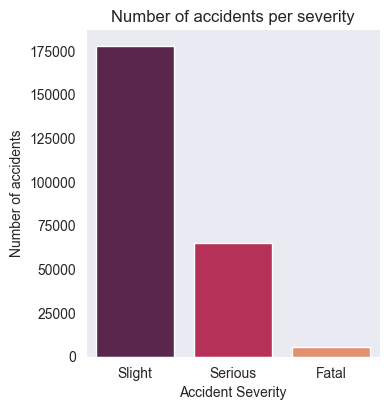

In [221]:
sns.catplot(data=df, x='accident_severity', kind='count', palette='rocket', height=4).set(title="Number of accidents per severity")
perc_slight = (df[df['accident_severity'] == 'Slight'].shape[0] / ORIGINAL_DATA_SIZE) * 100
perc_serious = (df[df['accident_severity'] == 'Serious'].shape[0] / ORIGINAL_DATA_SIZE) * 100
perc_fatal = (df[df['accident_severity'] == 'Fatal'].shape[0] / ORIGINAL_DATA_SIZE) * 100
print('Percentage of Slight accidents: {:.2f}%'.format(perc_slight))
print('Percentage of Serious accidents: {:.2f}%'.format(perc_serious))
print('Percentage of Fatal accidents: {:.2f}%'.format(perc_fatal))
plt.xlabel('Accident Severity')
plt.ylabel('Number of accidents')
plt.show()

>Slight accidents are the most common followed by Serious accidents. Fatal accidents are rare.

### Are there weekdays that tend to have accedents more/less than others?

Accidents happen on Friday MORE frequently with a percentage of 17.04% MORE than average by 2.75%
Accidents happen on Sunday LESS frequently with a percentage of 11.59% LESS than average by 2.69%


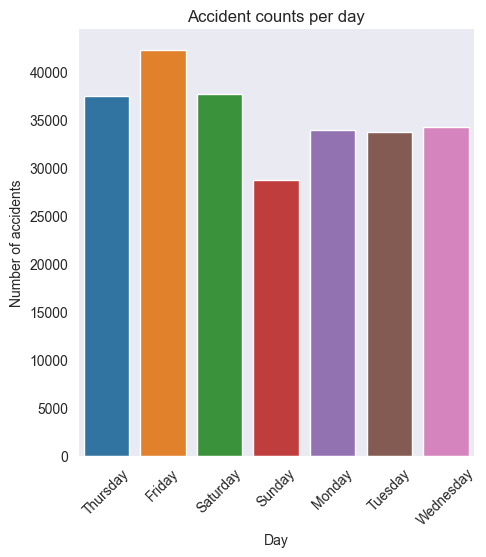

In [222]:
perc_per_day = df.groupby('day_of_week').count()['accident_index']
perc_per_day = (perc_per_day / ORIGINAL_DATA_SIZE) * 100
perc_per_day.sort_values(ascending=False, inplace=True)

average_percentage = perc_per_day.mean()

days = perc_per_day.index
values = perc_per_day.values

df.groupby('day_of_week').count() 


print('Accidents happen on {} MORE frequently with a percentage of {:.2f}% MORE than average by {:.2f}%'.format(days[0], values[0], values[0]-average_percentage))
print('Accidents happen on {} LESS frequently with a percentage of {:.2f}% LESS than average by {:.2f}%'.format(days[len(days)-1], values[len(values)-1], average_percentage-values[len(values)-1]))

sns.catplot(data=df, x='day_of_week', kind='count').set(title='Accident counts per day')
plt.xticks(rotation=45)
plt.xlabel('Day')
plt.ylabel('Number of accidents')
plt.show()

>Friday has the biggest number of accidents with 17.04% of the data, while Sunday has the lowest rate with 11.59%. 

### Do higher speed limits cause more accidents? 

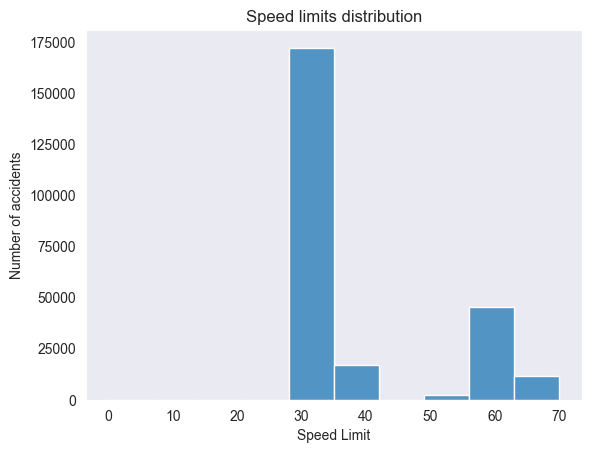

In [223]:
sns.histplot(df['speed_limit'], bins=10,).set(title='Speed limits distribution')
plt.xlabel('Speed Limit')
plt.ylabel('Number of accidents')
plt.show()

>No! Most accidents happend on speeds close to 30mph.

### Do higher speed limits cause more FATAL accidents?

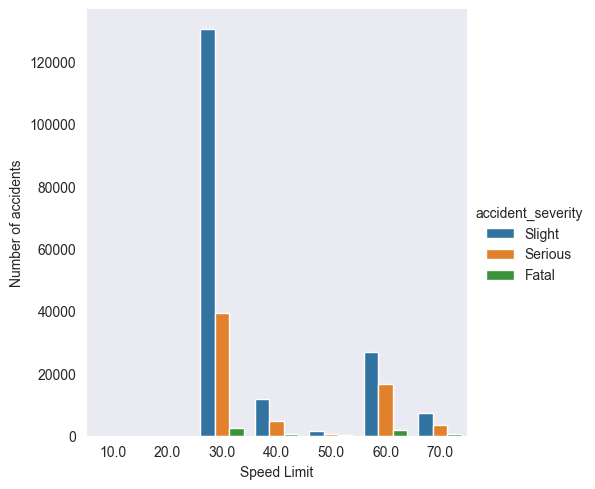

In [224]:
s = df['speed_limit'].value_counts().sort_values(ascending=False).index
speed = s[0:7]
d = df[df['speed_limit'].isin(speed)]
sns.catplot(data=d, x='speed_limit', kind='count', hue='accident_severity')
plt.xlabel('Speed Limit')
plt.ylabel('Number of accidents')
plt.show()

> No. Slight accidents dominate the records for all speed limits!

### Is there some time in the day when accidents happen more frequently? 

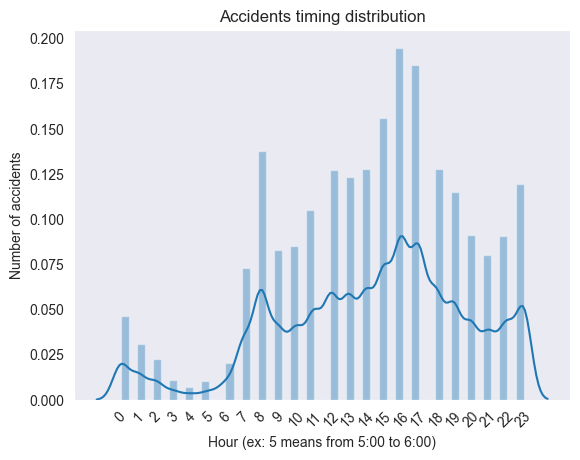

8.96% of the accident happend from 16:00 to 17:00
8.54% of the accident happend from 17:00 to 18:00
7.18% of the accident happend from 15:00 to 16:00


In [225]:
d = df.copy()
d['hour'] = pd.to_datetime(d['time'],format= '%H:%M' ).dt.hour
v = d['hour'].value_counts().sort_values(ascending=False)
hours = v.index.tolist()
sns.distplot(d['hour']).set(title='Accidents timing distribution')
plt.ylabel('Number of accidents')
plt.xlabel('Hour (ex: 5 means from 5:00 to 6:00)')
plt.xticks(range(0, 24), rotation=45)
plt.show()
for i in range(3):
    percentage = ((v.iloc[i] ) / ORIGINAL_DATA_SIZE) * 100
    print('{:.2f}% of the accident happend from {}:00 to {}:00'.format(percentage, hours[i], int(hours[i]) + 1))

> Yes! 31% of the accidents happened from 2pm to 6pm

# 3 - Cleaning Data

## Observing Missing and duplicate Data

### Columns with missing values and percentages of missing data for each column


In [227]:
def percentage_of_missing_values(df):
    columns_with_missing_values = df.columns[df.isna().any()]
    return df[columns_with_missing_values].isna().mean().sort_values(ascending=False) * 100

In [228]:
percentage_of_missing_values(df)

lsoa_of_accident_location                      100.000000
urban_or_rural_area                            100.000000
longitude                                      100.000000
latitude                                       100.000000
local_authority_ons_district                   100.000000
local_authority_highway                        100.000000
trunk_road_flag                                100.000000
did_police_officer_attend_scene_of_accident    100.000000
second_road_number                              54.892942
second_road_class                               54.889720
junction_control                                41.905379
special_conditions_at_site                      18.988948
pedestrian_crossing_human_control               17.622324
pedestrian_crossing_physical_facilities         17.622324
road_type                                       10.335272
weather_conditions                               0.306111
location_northing_osgr                           0.033431
location_easti

### Notice that the following columns have very small amount of missing data. 
### Since there is no pattern in the missing values and the amount is so small, hence it belongs to the <mark>MCAR </mark> type. 

<table>
  <tr>
    <th>Feature</th>
    <th>Percentage of missing data per feature</th>
  </tr>
  <tr>
    <td>weather_conditions</td>
    <td>0.306111%</td>
  </tr>
  <tr>
    <td>location_easting_osgr</td>
    <td>0.033431%</td>
  </tr>
  <tr>
    <td>location_northing_osgr</td>
    <td>0.033431%</td>
  </tr>

  <tr>
    <td>road_surface_conditions</td>
    <td>0.014097%</td>
  </tr>

  <tr>
    <td>light_conditions </td>
     <td>0.009667%</td>
  </tr>

  <tr>
    <td>carriageway_hazards </td>
     <td>0.008458%</td>
  </tr>

  <tr>
    <td>first_road_number</td>
     <td>0.005236%</td>
  </tr>

  <tr>
      <td>junction_detail </td>
      <td>0.003625%</td>
    </tr>

</table>



## Handling Missing data

#### Let's calculate the total amount of rows where a row has a missing value in ANY of these columns

In [229]:
columns_with_missing_values = df.columns[df.isna().any()]
columns_to_drop = df[columns_with_missing_values].isna().mean() * 100
columns_to_drop = columns_to_drop[columns_to_drop < 1]

In [230]:
total_rows = df[columns_to_drop.index] \
    .isna().any(axis=1).sum()
percentage = (total_rows / df.shape[0]) * 100
print('Total number of rows: ', total_rows)
print('These rows contribute to the dataset with {percentage:.2f}%'.format(percentage=percentage))

Total number of rows:  913
These rows contribute to the dataset with 0.37%


##### Since these rows contribute to the data with an amount < 1% , it's safe drop them.

In [231]:
l = columns_to_drop.index.tolist()
condition = df[l[0]].isna()
for i in range(1, len(l)):
    condition |= df[l[i]].isna()
df_droppedV1 = df[~condition]
new_size(df_droppedV1)

New data size: 247363 rows
Percentage of dropped data since beginning: 0.37%


### Now we need to handle the following columns

In [232]:
percentage_of_missing_values(df_droppedV1)

longitude                                      100.000000
latitude                                       100.000000
local_authority_ons_district                   100.000000
local_authority_highway                        100.000000
urban_or_rural_area                            100.000000
did_police_officer_attend_scene_of_accident    100.000000
trunk_road_flag                                100.000000
lsoa_of_accident_location                      100.000000
second_road_number                              54.908374
second_road_class                               54.905139
junction_control                                41.889046
special_conditions_at_site                      19.032758
pedestrian_crossing_human_control               17.663919
pedestrian_crossing_physical_facilities         17.663919
road_type                                       10.344716
dtype: float64

#### Longitude and Latitude are completely missing but they can be calculated using Easting and Northing 
> For this conversion we will use a library called convertbng
>> https://pypi.org/project/convertbng/


#### The following code takes each pair of (easting, norting) and converts it to (latitude, longitude), the new generated columns are then used to fill our missing data.

In [233]:
from convertbng.util import convert_osgb36_to_lonlat
easting = df_droppedV1['location_easting_osgr'].tolist()
northing = df_droppedV1['location_northing_osgr'].tolist()
long, lat = convert_osgb36_to_lonlat(easting, northing)
df_cleanedV2 = df_droppedV1
df_cleanedV2['longitude'] = long
df_cleanedV2['latitude'] = lat

### Are Longitude and LAtitude completely filled now?

In [234]:
df_cleanedV2[['latitude', 'longitude']].isna().mean()*100

latitude     0.176259
longitude    0.176259
dtype: float64

>No! 17.62% are still missing.

### Latitude and Longitude columns are now filled with data
####  But notice that there is still 0.17% of the records having NaN values, This is because the library that we used returns NaN for coordinates that are outside UK.
#### Given that these records belong to UK, the original coordinates should lie in UK.
#### Maybe an error happened when entering the data and easting and northing features were flipped??
>Let's try flipping them.

In [235]:
xx = df_cleanedV2[df_cleanedV2['latitude'].isna()]
# Flipping northing and easting and trying to convert again.
northing = xx['location_easting_osgr'].tolist()
easting = xx['location_northing_osgr'].tolist()
lon, lat = convert_osgb36_to_lonlat(easting, northing)
print(lat)

[58.0966236, nan, 57.27334435, 57.10290395, 58.71059545, 57.16375544, nan, 57.47336282, 57.88146393, nan, nan, 57.13739967, nan, nan, 57.23811356, 57.2156333, nan, nan, 56.45523643, nan, 57.86260306, 58.42050987, nan, nan, 57.28249414, nan, 57.14643315, nan, nan, nan, 58.7684083, 56.96305158, 58.68957085, 56.53806497, 56.5597363, 58.32465943, nan, nan, 58.79182782, nan, 56.62145436, 58.3441635, nan, nan, 57.6787433, nan, 58.73822004, 58.70512943, nan, nan, nan, nan, nan, nan, 57.16446208, nan, 58.72043696, 57.99326381, nan, nan, 56.88234807, nan, nan, 56.71325988, nan, nan, 58.39024952, nan, nan, nan, 58.64897037, 58.08095383, 56.84970284, 58.02656697, 57.74019468, 58.62956425, nan, nan, 58.73643778, nan, 58.46114193, nan, nan, 57.54604391, 57.96838027, 57.19607775, 57.16814213, nan, nan, 58.73431306, 57.1969724, nan, nan, nan, nan, nan, nan, 58.22577691, 58.72682611, 57.19607775, 57.63206755, 58.26260295, 57.85516613, 58.74096518, 56.84970284, 56.5395664, 57.1951831, 57.1951831, 57.19

> No! I tried the conversion again after flipping them and I got many NaN values
#### Since this data is incorrect and does not contribute much to the dataset I decided to drop it. 

### Dropping records with NaN values in Latitude and Longitude

In [236]:
df_cleanedV2 = df_cleanedV2[~df_cleanedV2['latitude'].isna()]
new_size(df_cleanedV2)

New data size: 246927 rows
Percentage of dropped data since beginning: 0.54%


#### Since the data belongs to UK and the british coordinate system consists of northing and easting values, This justifies why northing and easting columns are full while longitude and latitude are missing. Maybe they were not working with lat, long system and hence they did not record this data.
### Since there is a pattern (completely missing) and the pattern cannot be justified by the data, missing data of Latitude and Longitude belongs to the <mark>MNAR</mark> class.

### The columns 'urban_or_rural_area' and 'trunk_road_flag' are completely missing, We will build a KNN model using the data from 1995 and try to predict the missing values.
### For the same explanation as Latitude and Longitude, this missing data belongs to <mark>MNAR</mark> class. 

In [237]:
def fill_with_knn(df_training, df_fill, x, y):
    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import StandardScaler
    from sklearn.neighbors import KNeighborsClassifier
    l = []
    l.append(y)
    y = l
    df_training = df_training[x + y]
    df_train = df_training.dropna()

    X = df_train[x]
    Y = df_train[y]

    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1)

    scaler = StandardScaler()
    scaler.fit(X_train)

    X_train_transformed = scaler.transform(X_train)
    X_test_transformed = scaler.transform(X_test)

    knn = KNeighborsClassifier()
    knn.fit(X_train_transformed, Y_train)
    score = knn.score(X_test_transformed, Y_test) * 100
    print('Accuracy for predicting {} is: {:.2f}%'.format(y[0], score))

    scaler = StandardScaler()
    X_transformed = scaler.fit_transform(X)

    knn = KNeighborsClassifier()
    knn.fit(X_transformed, Y)
    
    rows_to_predict = df_fill[df_fill[y[0]].isna()]
    rows_to_predict_x = scaler.transform(rows_to_predict[x])
    rows_to_predict[y] = knn.predict(rows_to_predict_x).reshape(-1,1)

    df_fill[y] = rows_to_predict[y]

### Now we can use this model to predict our missing values in both columns.

In [238]:
data_urban_rural = pd.read_csv('1995_Accidents_UK.csv')
data_trunk_road = data_urban_rural.copy()
data_urban_rural = data_urban_rural[data_urban_rural['urban_or_rural_area'] != 'Unallocated']
data_trunk_road = data_trunk_road[data_trunk_road['trunk_road_flag'] != 'Data missing or out of range']
df_cleanedV3 = df_cleanedV2.copy()
fill_with_knn(df_training=data_urban_rural, df_fill=df_cleanedV3, x=['location_easting_osgr', 'location_northing_osgr'], y='urban_or_rural_area')
fill_with_knn(df_training=data_trunk_road, df_fill=df_cleanedV3, x=['location_easting_osgr', 'location_northing_osgr'], y='trunk_road_flag')

Accuracy for predicting urban_or_rural_area is: 94.87%
Accuracy for predicting trunk_road_flag is: 96.21%


### The column 'local_authority_district' contains a mix of districts and some uninterpretable numbers.
### We will consider these numbers as missing values and train KNN model with the existing records and predict the missing ones  

In [239]:
temp = df_cleanedV3.copy()
is_digit = temp['local_authority_district'].astype(str).str.isdigit()
missing = temp[is_digit]
existing = temp[~is_digit]
missing['local_authority_district'] = np.nan
fill_with_knn(df_training=existing, df_fill=missing, x=['longitude', 'latitude'], y='local_authority_district')
df_cleanedV4 = pd.concat([existing, missing])

Accuracy for predicting local_authority_district is: 86.68%


### Notice that second_road_number is the only column having missing values because first_road_class is either C or Unclassified, since there is a reason for the data to be missing, this belongs to the <mark>MAR</mark> type.

In [240]:
df_cleanedV4['second_road_number'].unique()

array([nan,
       'first_road_class is C or Unclassified. These roads do not have official numbers so recorded as zero ',
       '5295.0', ..., '729.0', '710.0', '794.0'], dtype=object)

### Since our data is purely categorical, if a column has alot of missing values imputing using the mode will cause the data to be skewed and this will affect out analysis. It's better to drop categorical columns that has many missing values.
### Now we will drop all columns that has more than 80% missing values

In [241]:
perc = percentage_of_missing_values(df_cleanedV4)
columns_to_drop = df_cleanedV4[perc[perc > 50].index.tolist()]
df_cleanedV5 = df_cleanedV4.drop(columns_to_drop, axis='columns')
new_size(df_cleanedV5)

New data size: 246927 rows
Percentage of dropped data since beginning: 0.54%


In [242]:
percentage_of_missing_values(df_cleanedV5)

junction_control                           41.866220
special_conditions_at_site                 19.066364
pedestrian_crossing_human_control          17.695108
pedestrian_crossing_physical_facilities    17.695108
road_type                                  10.362982
dtype: float64

### Let's inspect the percentage of the mode for one of the above columns.

In [243]:
value_counts = df_cleanedV5['pedestrian_crossing_human_control'].value_counts()
value_counts / value_counts.sum()

None within 50 metres                 0.995419
Control by school crossing patrol     0.003808
Control by other authorised person    0.000773
Name: pedestrian_crossing_human_control, dtype: float64

### The output of the above cell shows that the mode is dominating with more than 99%. Columns like this are not useful for analysis. It acts almost like a column that is full with one value. So let's drop columns that have mode greater than 95% of the column.

In [244]:
columns = percentage_of_missing_values(df_cleanedV5).index.tolist()
for i in columns:
    value_counts = df_cleanedV5[i].value_counts()
    mode_percentage = (value_counts / value_counts.sum()).values[0]
    if mode_percentage >= 0.95:
        df_cleanedV5.drop(i, axis='columns', inplace=True)

In [245]:
percentage_of_missing_values(df_cleanedV5)

junction_control                           41.866220
pedestrian_crossing_physical_facilities    17.695108
road_type                                  10.362982
dtype: float64

### Junction_control columns has 41.8% missing values. Imputing with the mode here is not a good option because it may lead to skewness in this column. So let's impute using an arbitrary value.

In [246]:
df_cleanedV5['junction_control'].fillna('Missing', inplace=True)
append_lookup('junction_control', np.nan, 'Missing')

### The rest of the columns now are categorical and the missing values are less than 50% of these columns.
### Let's check the mode of these columns.
> The following code gets the names of categorical columns that have missing values.

In [247]:
columns = df_cleanedV5.columns
numeric_columns = df_cleanedV5._get_numeric_data().columns
categorical_columns = list(set(columns) - set(numeric_columns))
missing_columns = df_cleanedV5.columns[df_cleanedV5.isna().any()]
categorical_missing = list(set(categorical_columns).intersection(set(missing_columns)))
condition = df_cleanedV5[categorical_missing].isna().mean() * 100 < 50
categorical_missing = condition[condition].index
categorical_missing

Index(['pedestrian_crossing_physical_facilities', 'road_type'], dtype='object')

### Now let's check the mode of these columns.

In [248]:
percentages = []
for col in categorical_missing:
    mode = df_cleanedV5[col].mode()[0]
    occurences_of_mode = df_cleanedV5[col].value_counts().sort_values(ascending=False)[0]
    total = df_cleanedV5[col].value_counts().sort_values().sum()
    percentage = (occurences_of_mode / total) * 100
    percentages.append(percentage)
    print('Column:', col)
    print('Mode:', mode)
    print('Occurences:', occurences_of_mode)
    print('Contribution to the column: {:.2f}%'.format(percentage))
    print('-----------------')
        

Column: pedestrian_crossing_physical_facilities
Mode: No physical crossing facilities within 50 metres
Occurences: 181948
Contribution to the column: 89.53%
-----------------
Column: road_type
Mode: Single carriageway
Occurences: 180800
Contribution to the column: 81.69%
-----------------


### Since the mode is dominating these columns by high percentage & the amount of missing values are not much compared to other columns, imputing using the mode here is a good option.
### Now let's fill these columns using the mode.

In [249]:
df_cleanedV6 = df_cleanedV5.copy()
for i, col in enumerate(categorical_missing):
        df_cleanedV6[col].fillna(df_cleanedV6[col].mode()[0],inplace=True)

#### accident_index and accident_reference are unique columns so they are not useful for analysis. Also, the year column has only one value. So let's drop these 3 columns.

In [250]:
df_cleanedV7 = df_cleanedV6.drop(['accident_index', 'accident_year', 'accident_reference'], axis='columns')

### Let's investigate if there are any duplicate rows and drop them if there is any.

In [251]:
duplicate = df_cleanedV7.duplicated().sum()
print('The dataset contained {} duplicated rows'.format(duplicate))
if(duplicate > 0):
    df_cleanedV8 = df_cleanedV7.drop_duplicates()
new_size(df_cleanedV8)

The dataset contained 53 duplicated rows
New data size: 246874 rows
Percentage of dropped data since beginning: 0.56%


### Finally the columns First road number contains unique numbers that identify the roads so it is useless to our analysis.

In [252]:
df_cleanedV8.drop('first_road_number', axis=1, inplace=True)

## Findings and conclusions

### Let's confirm that we don't have any missing values.

In [253]:
df_cleanedV8.isna().sum()

location_easting_osgr                      0
location_northing_osgr                     0
longitude                                  0
latitude                                   0
police_force                               0
accident_severity                          0
number_of_vehicles                         0
number_of_casualties                       0
date                                       0
day_of_week                                0
time                                       0
local_authority_district                   0
first_road_class                           0
road_type                                  0
speed_limit                                0
junction_detail                            0
junction_control                           0
pedestrian_crossing_physical_facilities    0
light_conditions                           0
weather_conditions                         0
road_surface_conditions                    0
carriageway_hazards                        0
urban_or_r

>All columns are now completely filled.

### Conclusion:
<ul>
    <li>Some columns were unique, hence they were dropped. (Accident_index, year, etc.)</li>
    <li>For the columns that had very small percentage of missing values, the rows were dropped.</li>
    <li>Categorical columns with more than 80% missing values were dropped in order not to skew the data by using the mode.</li>
    <li>Latitude and Longitude columns were inferred using other columns.</li>
    <li>Some columns were filled using KNN trained on another dataset.</li>
    <li>Rows with high percentage of mode were imputed using the mode.</li>
    <li>Duplicates were dropped.</li>
</ul>

# 4 - Data transformation

## 4.1 - Discretization

#### Add a new column named 'Week number' and discretize the data into weeks according to the dates.

In [254]:
dicretized = df_cleanedV8.copy()
dicretized['Week number'] = df_cleanedV8['date'].dt.isocalendar().week

#### From EDA notice that speed limits below 30mph contributes with very small percentage to the data set, so let's remove them and apply discretization afterwards.  

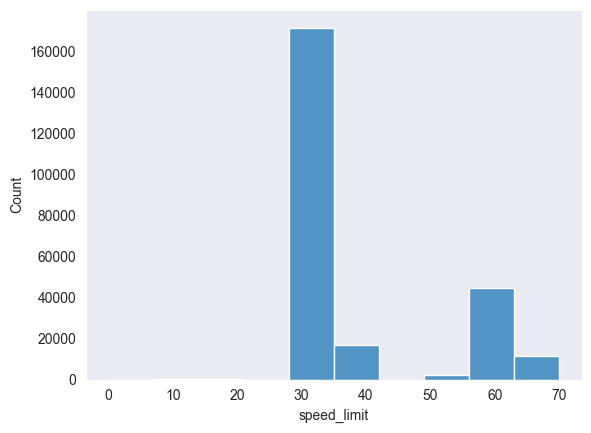

In [255]:
sns.histplot(data=dicretized, x='speed_limit', bins=10)
plt.show()

In [256]:
dicretized['speed_limit'].value_counts()

30.0    171395
60.0     44828
40.0     16762
70.0     11539
50.0      2156
10.0        82
20.0        45
15.0        34
0.0          7
34.0         4
62.0         3
66.0         3
38.0         3
25.0         3
65.0         2
61.0         1
32.0         1
48.0         1
33.0         1
37.0         1
55.0         1
39.0         1
35.0         1
Name: speed_limit, dtype: int64

### Let's approximate each number to the nearest ten:
> 54 -> 50 <br>
> 115 -> 120

In [257]:
dicretized = dicretized[dicretized['speed_limit'] >= 30]
dicretized['speed_limit'] = round(dicretized['speed_limit'], -1)
dicretized['speed_limit'].value_counts()

30.0    171401
60.0     44835
40.0     16768
70.0     11542
50.0      2157
Name: speed_limit, dtype: int64

### The column light_condition has 5 unique values:
Daylight <br>
Darkness - lights lit<br>
Darkness - no lighting<br>
Darkness - lighting unknown<br>
Darkness - lights unlit<br>
### For easier analysis let's group these labels into 2 groups (normal conditions or non-normal conditions)
### Let's consider normal conditions to be Daylight and Darkness - lights lit.

In [258]:
mapp = {}
unique_light_conditions = dicretized['light_conditions'].unique()
unique_light_conditions.tolist()
for i in unique_light_conditions:
    if i == 'Daylight' or i == 'Darkness - lights lit':
        mapp[i] = 'Normal'
    else:
        mapp[i] = 'Non-normal'

dicretized['light_conditions'] = dicretized['light_conditions'].map(mapp)

### Let's apply the same strategy with road_surface_conditions. It has the following unique values:
Dry                     
Wet or damp             
Frost or ice            
Snow                    
Flood over 3cm. deep    
### Let's treat 'Dry' as a normal condition and any other value will be non-normal.

In [259]:
mapp = {}
unique_light_conditions = dicretized['road_surface_conditions'].unique()
unique_light_conditions.tolist()
for i in unique_light_conditions:
    if i == 'Dry':
        mapp[i] = 'Normal'
    else:
        mapp[i] = 'Non-normal'

dicretized['road_surface_conditions'] = dicretized['road_surface_conditions'].map(mapp)

### Now let's apply the same strategy with the following columns :
carriageway_hazards <br>
pedestrian_crossing_physical_facilities<br>
weather_conditions<br>
junction_detail<br>
junction_control<br>

In [260]:
mapp = {}
unique_light_conditions = dicretized['carriageway_hazards'].unique()
unique_light_conditions.tolist()
for i in unique_light_conditions:
    if i == 'None':
        mapp[i] = 'Normal'
    else:
        mapp[i] = 'Non-normal'

dicretized['carriageway_hazards'] = dicretized['carriageway_hazards'].map(mapp)

In [261]:
mapp = {}
unique_light_conditions = dicretized['pedestrian_crossing_physical_facilities'].unique()
unique_light_conditions.tolist()
for i in unique_light_conditions:
    if i == 'No physical crossing facilities within 50 metres':
        mapp[i] = 0
    else:
        mapp[i] = 1

dicretized['pedestrian_crossing_physical_facilities'] = dicretized['pedestrian_crossing_physical_facilities'].map(mapp)

In [262]:
mapp = {}
unique_light_conditions = dicretized['weather_conditions'].unique()
unique_light_conditions.tolist()
for i in unique_light_conditions:
    if i == 'Fine no high winds':
        mapp[i] = 'Normal'
    else:
        mapp[i] = 'Non-Normal'

dicretized['weather_conditions'] = dicretized['weather_conditions'].map(mapp)

In [263]:
mapp = {}
unique_light_conditions = dicretized['junction_detail'].unique()
unique_light_conditions.tolist()
for i in unique_light_conditions:
    if i == 'Not at junction or within 20 metres':
        mapp[i] = 'Normal'
    else:
        mapp[i] = 'Non-Normal'

dicretized['junction_detail'] = dicretized['junction_detail'].map(mapp)

In [264]:
mapp = {}
unique_light_conditions = dicretized['junction_control'].unique()
unique_light_conditions.tolist()
for i in unique_light_conditions:
    if i == 'Give way or uncontrolled':
        mapp[i] = 'Uncontrolled'
    elif i == 'Missing':
        mapp[i] = 'Missing'
    else:
        mapp[i] = 'Controlled'

dicretized['junction_control'] = dicretized['junction_control'].map(mapp)

### The following line will return a list of the numeric columns. This will be helpful in normalization.

In [265]:
to_be_normalized = dicretized.select_dtypes(include=np.number).columns.tolist()

## 4.11 - Findings and conclusions

### Now the dates have been transformed into weeks. This enables us to analyze the data by week and gives us a smaller range of values to work with.

In [266]:
dicretized['Week number'].unique()

<IntegerArray>
[ 1,  5,  9, 14, 18, 23, 27, 31, 36, 40, 44, 49,  3,  4,  6, 10, 45,  7,  8,
 32, 11, 12, 13, 19, 16, 17,  2, 41, 20, 21, 22, 15, 28, 24, 25, 26, 37, 50,
 29, 30, 33, 34, 35, 46, 38, 39, 42, 43, 47, 48, 51, 52, 53]
Length: 53, dtype: UInt32

### Similarly with speed limits, now we only have 5 unique values to deal with.

In [267]:
dicretized['speed_limit'].unique()

array([30., 40., 70., 60., 50.])

### light_conditions has only 2 values.

In [268]:
dicretized['light_conditions'].unique()

array(['Normal', 'Non-normal'], dtype=object)

### road_surface_conditions has only 2 values.

In [269]:
dicretized['road_surface_conditions'].value_counts()  / dicretized['road_surface_conditions'].value_counts().sum()

Normal        0.626758
Non-normal    0.373242
Name: road_surface_conditions, dtype: float64

# And similarly for all other columns.

## 4.2 - Encoding

## Let's start by getting the names of categorical features. And see how many unique values does each column have.

In [270]:
encoded = dicretized.copy()
categorical_columns = dicretized.select_dtypes(exclude=["number"]).columns.tolist()
encoded[categorical_columns].nunique().sort_values()

junction_detail                2
light_conditions               2
weather_conditions             2
road_surface_conditions        2
carriageway_hazards            2
urban_or_rural_area            2
trunk_road_flag                2
accident_severity              3
junction_control               3
road_type                      4
first_road_class               6
day_of_week                    7
police_force                  51
local_authority_district     345
date                         365
time                        1396
dtype: int64

### Let's first start by doing binary encoding for all <mark>binary</mark> features.

In [271]:
binary_columns = encoded[categorical_columns].nunique() == 2
binary_columns = binary_columns[binary_columns].index.tolist()
for col in binary_columns:
    encoding = pd.get_dummies(encoded[col], drop_first=True)
    encoded['{}_{}'.format(col, encoding.columns[0])] = encoding
    encoded.drop(col, axis='columns', inplace=True)

### Accident severity has three <mark>Oridinal</mark> values (Slight, Serious, Fatal). For this case label encoding is suitable.

In [272]:
from sklearn.preprocessing import LabelEncoder
encoded['accident_severity'] = LabelEncoder().fit_transform(encoded['accident_severity'])
append_lookup('accident_severity', 'Slight', 2)
append_lookup('accident_severity', 'Serious', 1)
append_lookup('accident_severity', 'Fatal', 0)

### Now for all columns that have unique values less than 10, let's do one hot encoding.
#### One hot encoding is suitable since these features are <mark>nominal</mark> and they are not binary.

In [273]:
categorical_columns = encoded.select_dtypes(exclude=["number"]).columns.tolist()
s = encoded[categorical_columns].nunique()
columns = s[(s < 10)].index.tolist()

for col in columns:
    encoding = pd.get_dummies(encoded[col], prefix=col)
    encoded.drop(col, axis='columns', inplace=True)
    encoded = pd.concat([encoded, encoding], axis='columns')

In [274]:
excluded = encoded.drop(['date', 'time'], axis=1)
categorical_columns = excluded.select_dtypes(exclude=["number"]).columns.tolist()
categorical_columns

['police_force', 'local_authority_district']

### Police_force and local_authority_district have so many categories, using one hot encoding will create many columns and will not be suitable for this case. Instead let's perform one hot encoding for the top 10 categories only.

In [275]:
def calculate_top_categories(df, variable, how_many):
    return [
        x for x in df[variable].value_counts().sort_values(
            ascending=False).head(how_many).index
    ]

def one_hot_encode(df, variable, top_x_labels):
    for label in top_x_labels:
        df[variable + '_' + label] = np.where(
            df[variable] == label, 1, 0) 

In [276]:
for i in categorical_columns:
    top = calculate_top_categories(encoded, i, 10)
    one_hot_encode(encoded, i, top)
    encoded.drop(i, axis=1, inplace=True)


In [277]:
encoded.select_dtypes(exclude=["number"]).columns.tolist()

['date', 'time']

## 4.22 - Findings and conlcusions

<ul>
    <li>Binary encoding was used for binary columns such as Urban or Rural.</li>
    <li>One hot encoding was used for categories that are not more than 10.</li>
    <li>One hot encoding for most frequent labels was used if the categories are more than 10.</li>
    <li>The types of columns is now numeric except for the date and time which will be handled in the next section.</li>
</ul>

In [278]:
encoded.head()

,location_easting_osgr,location_northing_osgr,longitude,latitude,accident_severity,number_of_vehicles,number_of_casualties,date,time,speed_limit,...,local_authority_district_Spelthorne,local_authority_district_Westminster,local_authority_district_Southwark,local_authority_district_Birmingham,local_authority_district_Lambeth,local_authority_district_Croydon,local_authority_district_Barnet,local_authority_district_Islington,local_authority_district_Hackney,local_authority_district_Camden
0,409490.0,430000.0,-1.857516,53.766278,2,3,1,1981-01-01,00:45,30.0,...,0,0,0,0,0,0,0,0,0,0
1,343790.0,747000.0,-2.917379,56.611478,2,2,4,1981-01-01,00:50,40.0,...,0,0,0,0,0,0,0,0,0,0
2,92370.0,202000.0,-6.447135,51.632471,2,3,4,1981-01-01,00:55,30.0,...,0,0,0,0,0,0,0,0,0,0
3,129270.0,489000.0,-6.155094,54.224961,2,3,2,1981-01-01,01:05,30.0,...,0,0,0,0,0,0,0,0,0,0
4,368270.0,173000.0,-2.458051,51.455082,2,1,1,1981-01-01,01:10,30.0,...,0,0,0,0,0,0,0,0,0,0


## 4.4 - Adding more columns

### Let's add a column to indicate if the accident happened on weekend days or not. More over let's create a column for the month and drop the date since the year is always 1981 and we are not interested in the day itself. 

In [279]:
add_columns = encoded.copy()
add_columns['Weekend'] = (add_columns['date'].dt.dayofweek > 4).astype(int)
add_columns['month'] = add_columns['date'].dt.month

### Accidents are not that frequent, so it's better to analyze them for every 6 hours rather than every hour. Let's divide the time into 4 intervals of 6 hours (Morning, Afternoon, Evening and Dawn). Afterward we will perform one hot encoding since this feature is nominal. 

In [280]:
add_columns['datetime'] = add_columns['date'].astype(str) + ' ' + add_columns['time']
add_columns['datetime'] = pd.to_datetime(add_columns['datetime'])
mapp = {}
for i in range(24):
    if 5 <= i <= 11:
        mapp[str(i)] = 'Morning'
    elif 12 <= i <= 18: 
        mapp[str(i)] = 'Afternoon'
    elif 19 <= i <= 24: 
        mapp[str(i)] = 'Evening'
    else:
         mapp[str(i)] = 'Dawn'
add_columns['time'] = (add_columns['datetime'].dt.hour).astype(str).map(mapp)
one_hot = pd.get_dummies(add_columns['time'])
add_columns = pd.concat([add_columns, one_hot], axis='columns')
add_columns.drop(['time', 'date', 'datetime'], inplace=True, axis=1)
add_columns.head()

,location_easting_osgr,location_northing_osgr,longitude,latitude,accident_severity,number_of_vehicles,number_of_casualties,speed_limit,pedestrian_crossing_physical_facilities,Week number,...,local_authority_district_Barnet,local_authority_district_Islington,local_authority_district_Hackney,local_authority_district_Camden,Weekend,month,Afternoon,Dawn,Evening,Morning
0,409490.0,430000.0,-1.857516,53.766278,2,3,1,30.0,0,1,...,0,0,0,0,0,1,0,1,0,0
1,343790.0,747000.0,-2.917379,56.611478,2,2,4,40.0,0,1,...,0,0,0,0,0,1,0,1,0,0
2,92370.0,202000.0,-6.447135,51.632471,2,3,4,30.0,0,1,...,0,0,0,0,0,1,0,1,0,0
3,129270.0,489000.0,-6.155094,54.224961,2,3,2,30.0,0,1,...,0,0,0,0,0,1,0,1,0,0
4,368270.0,173000.0,-2.458051,51.455082,2,1,1,30.0,0,1,...,0,0,0,0,0,1,0,1,0,0


## 4.41 - Findings and concluisons

<ul>
    <li>Weekend column was created to indicate if the accident happend on a weekend day or not.</li>
    <li>Time was divided into 4 intervals.</li>
</ul>

## Removing Outliers

###  Speed limit, Number of Vehicles and Number of Casualties are numeric features. Let's inspect their outliers but first let's plot their distributions.

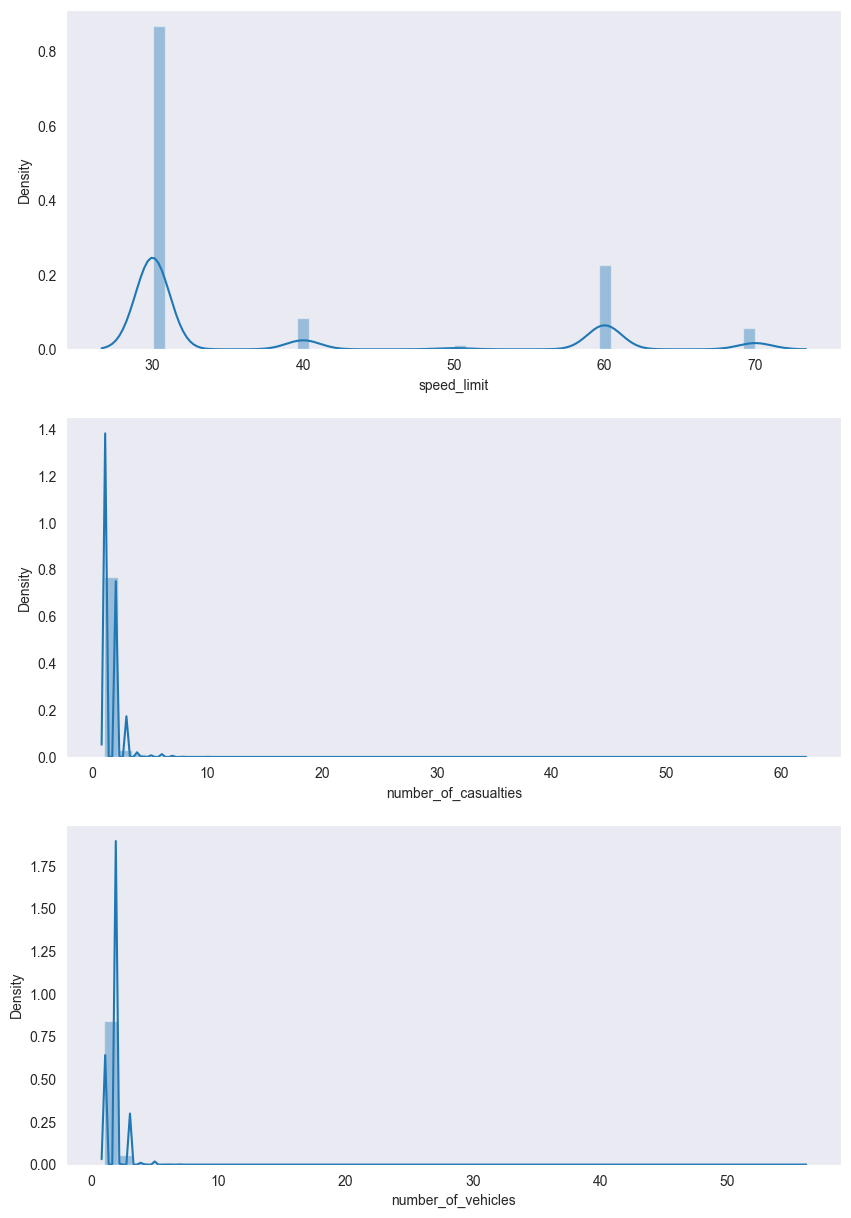

In [281]:
fig, ax = plt.subplots(3, 1)
fig.set_figheight(15)
fig.set_figwidth(10)
sns.distplot(add_columns['speed_limit'], ax=ax[0])
sns.distplot(add_columns['number_of_casualties'], ax=ax[1])
sns.distplot(add_columns['number_of_vehicles'], ax=ax[2])
plt.show()

### Their distributions are not normal. Z-Score normalization is not suitable in this case. Let's try the IQR method.

In [282]:
def outliers_iqr(df, feature, remove_outliers=False):
    q1 = df[feature].quantile(0.25)
    q3 = df[feature].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5*iqr
    upper = q3 + 1.5*iqr

    f = (df[feature] > upper) | (df[feature] < lower)

    number_of_outliers = df[f].shape[0]
    percentage = 100 * number_of_outliers / ORIGINAL_DATA_SIZE
    print('Outliers contribute with {:.2f}% to the dataset.'.format(percentage))
    if remove_outliers:
        return df[~f]

### Let's see if we can remove outliers using IQR method.

In [283]:
outliers_iqr(add_columns, 'speed_limit')

Outliers contribute with 22.71% to the dataset.


In [284]:
outliers_iqr(add_columns, 'number_of_casualties')

Outliers contribute with 20.13% to the dataset.


In [285]:
outliers_iqr(add_columns, 'number_of_vehicles')

Outliers contribute with 1.53% to the dataset.


### IQR method will result in removing large portion of the data. Let's try LOF.

### Since the data is categorical, LOF will be helpful in removing outliers.

### Location features such as latitude and longitude are not linear, thus we excluded them when we calculated the outliers.

In [286]:
from sklearn.neighbors import LocalOutlierFactor as LOF
outliers_dropped = add_columns.copy()
X = outliers_dropped.drop(['longitude', 'latitude', 'location_easting_osgr', 'location_northing_osgr'], axis=1)
predictions =  LOF().fit_predict(X)
outliers_dropped['outlier'] = predictions

In [287]:
outliers = outliers_dropped[outliers_dropped['outlier'] == -1]
outliers_dropped = outliers_dropped[outliers_dropped['outlier'] == 1]
outliers_dropped.drop('outlier', axis=1, inplace=True)
print('Total number of outliers: {}'.format(outliers.shape[0]))
new_size(outliers_dropped)

Total number of outliers: 534
New data size: 246169 rows
Percentage of dropped data since beginning: 0.85%


# Normalization

### Now let's normalize all numeric features except for location features as it's not meaningful to perform calculations on location.

### Z-Score normalization and MinMax normalization are ok, However MinMax will result in all the features having the same range [0, 1] which is better for comparison and if any feature is added in the future it will have the same range.

In [288]:
pre_normalized = outliers_dropped.copy()
min_max_normalized = pre_normalized.copy()
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
x = outliers_dropped[to_be_normalized]
x = x.loc[:, ~x.columns.isin(['longitude', 'latitude', 'location_northing_osgr', 'location_easting_osgr'])]
min_max_normalized[x.columns] = min_max_scaler.fit_transform(x)

## Before 

In [289]:
pre_normalized[to_be_normalized]

,location_easting_osgr,location_northing_osgr,longitude,latitude,number_of_vehicles,number_of_casualties,speed_limit,pedestrian_crossing_physical_facilities,Week number
0,409490.0,430000.0,-1.857516,53.766278,3,1,30.0,0,1
1,343790.0,747000.0,-2.917379,56.611478,2,4,40.0,0,1
2,92370.0,202000.0,-6.447135,51.632471,3,4,30.0,0,1
3,129270.0,489000.0,-6.155094,54.224961,3,2,30.0,0,1
4,368270.0,173000.0,-2.458051,51.455082,1,1,30.0,0,1
...,...,...,...,...,...,...,...,...,...
248271,308200.0,602700.0,-3.447799,55.309796,1,1,70.0,0,52
248272,247710.0,546500.0,-4.370030,54.790218,2,1,30.0,0,46
248273,237800.0,556900.0,-4.529828,54.880478,1,2,60.0,0,52
248274,213200.0,558200.0,-4.913604,54.883560,2,1,60.0,0,52


## After

In [290]:
min_max_normalized[to_be_normalized].head()

,location_easting_osgr,location_northing_osgr,longitude,latitude,number_of_vehicles,number_of_casualties,speed_limit,pedestrian_crossing_physical_facilities,Week number
0,409490.0,430000.0,-1.857516,53.766278,0.181818,0.000000,0.00,0.0,0.0
1,343790.0,747000.0,-2.917379,56.611478,0.090909,0.250000,0.25,0.0,0.0
2,92370.0,202000.0,-6.447135,51.632471,0.181818,0.250000,0.00,0.0,0.0
3,129270.0,489000.0,-6.155094,54.224961,0.181818,0.083333,0.00,0.0,0.0
4,368270.0,173000.0,-2.458051,51.455082,0.000000,0.000000,0.00,0.0,0.0


## 4.5 - Csv file for lookup

In [291]:
pd.DataFrame(csv_lookup).set_index('Column Name').to_csv('csv_lookup.csv')
pd.read_csv('csv_lookup.csv')

,Column Name,Original value,Mapped value
0,junction_control,NaN,Missing
1,accident_severity,Slight,2
2,accident_severity,Serious,1
3,accident_severity,Fatal,0


## 5- Exporting the dataframe to a csv file or parquet

In [292]:
min_max_normalized.to_parquet('final.parquet')
min_max_normalized.to_csv('final.csv')

# Loading DataFrame from parquet file.

In [293]:
loaded = pd.read_parquet('final.parquet')
loaded.head()

,location_easting_osgr,location_northing_osgr,longitude,latitude,accident_severity,number_of_vehicles,number_of_casualties,speed_limit,pedestrian_crossing_physical_facilities,Week number,...,local_authority_district_Barnet,local_authority_district_Islington,local_authority_district_Hackney,local_authority_district_Camden,Weekend,month,Afternoon,Dawn,Evening,Morning
0,409490.0,430000.0,-1.857516,53.766278,2,0.181818,0.000000,0.00,0.0,0.0,...,0,0,0,0,0,1,0,1,0,0
1,343790.0,747000.0,-2.917379,56.611478,2,0.090909,0.250000,0.25,0.0,0.0,...,0,0,0,0,0,1,0,1,0,0
2,92370.0,202000.0,-6.447135,51.632471,2,0.181818,0.250000,0.00,0.0,0.0,...,0,0,0,0,0,1,0,1,0,0
3,129270.0,489000.0,-6.155094,54.224961,2,0.181818,0.083333,0.00,0.0,0.0,...,0,0,0,0,0,1,0,1,0,0
4,368270.0,173000.0,-2.458051,51.455082,2,0.000000,0.000000,0.00,0.0,0.0,...,0,0,0,0,0,1,0,1,0,0
